In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df['Yearday'] = df['Date'].dt.dayofyear
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index','Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday,Yearday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2,305
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2,305
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2,305
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2,305
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2,305


In [4]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]
df1 = df.copy(deep=True)
better = df1.TLCompany.unique()
bet_dict = dict(zip(better, range(len(better))))
df1 = df1.replace({'TLCompany': bet_dict})
df1 = df1.replace({'BLCompany': bet_dict})
#try betting dummification
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,5,0,4,1,4,2006,11,44,2,305,4.75,9
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,7,1,7,1,4,2006,11,44,2,305,7.00,10
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,5,2,4,3,4,2006,11,44,2,305,4.75,-1
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,-1,1,-2,2,4,2006,11,44,2,305,-1.25,15
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,6,2,6,2,4,2006,11,44,2,305,6.00,3


In [5]:
df2 = df1[(df1['HomeTeam'] == 'LAL') | (df1['AwayTeam'] == 'LAL')]
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,GSW,LAL,0.0,1.0,0.000,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.0,-12
48,LAL,MIN,4.0,1.0,0.800,2.0,3.0,0.400,7,2,7,2,4,2006,11,45,1,311,7.0,7
58,POR,LAL,3.0,2.0,0.600,4.0,2.0,0.667,-4,1,-5,3,4,2006,11,45,2,312,-4.5,11
64,LAL,DET,4.0,3.0,0.571,3.0,3.0,0.500,5,2,5,2,4,2006,11,45,4,314,5.0,-14
83,LAL,MEM,5.0,3.0,0.625,1.0,5.0,0.167,9,2,9,2,4,2006,11,45,6,316,9.0,10


In [ ]:
dum1 = pd.get_dummies(df2['AwayTeam'])
df2 = pd.concat([df2, dum1], axis=1)
df2 = df2.drop(['AwayTeam'], axis=1)
df2.head()

In [6]:
team = df2.AwayTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df2 = df2.replace({'HomeTeam': team_dict})
df2 = df2.replace({'AwayTeam': team_dict})
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,20,0,0.0,1.0,0.000,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.0,-12
48,0,1,4.0,1.0,0.800,2.0,3.0,0.400,7,2,7,2,4,2006,11,45,1,311,7.0,7
58,24,0,3.0,2.0,0.600,4.0,2.0,0.667,-4,1,-5,3,4,2006,11,45,2,312,-4.5,11
64,0,2,4.0,3.0,0.571,3.0,3.0,0.500,5,2,5,2,4,2006,11,45,4,314,5.0,-14
83,0,3,5.0,3.0,0.625,1.0,5.0,0.167,9,2,9,2,4,2006,11,45,6,316,9.0,10


In [ ]:
df2 = df2.drop(['HomeTeam'], axis=1)

In [7]:
print (len(df2))
df2['AwayTeam'] = pd.to_numeric(df2['AwayTeam'], errors='coerce')
df2 = df2.dropna()
print (len(df2))

1026
1026


In [8]:
#Look if team is marked as 0 or 1

df2.loc[df2['HomeTeam'] == 0, 'HomeCourt'] = 1
df2.loc[df2['HomeTeam'] != 0, 'HomeCourt'] = 0
df2['Opponent'] = df2['HomeTeam'] + df2['AwayTeam'] - 0
df2.loc[df2['HomeCourt'] == 1, 'OppWin'] = df2['ATWin']
df2.loc[df2['HomeCourt'] != 1, 'OppWin'] = df2['HTWin']
df2.loc[df2['HomeCourt'] == 1, 'Win'] = df2['HTWin']
df2.loc[df2['HomeCourt'] != 1, 'Win'] = df2['ATWin']
df2.loc[df2['HomeCourt'] == 1, 'OppLoss'] = df2['ATLoss']
df2.loc[df2['HomeCourt'] != 1, 'OppLoss'] = df2['HTLoss']
df2.loc[df2['HomeCourt'] == 1, 'Loss'] = df2['HTLoss']
df2.loc[df2['HomeCourt'] != 1, 'Loss'] = df2['ATLoss']
df2.loc[df2['HomeCourt'] == 1, 'Opp%'] = df2['AT%']
df2.loc[df2['HomeCourt'] != 1, 'Opp%'] = df2['HT%']
df2.loc[df2['HomeCourt'] == 1, 'Own%'] = df2['HT%']
df2.loc[df2['HomeCourt'] != 1, 'Own%'] = df2['AT%']
df2.loc[df2['HomeCourt'] == 1, 'average'] = df2['average']
df2.loc[df2['HomeCourt'] != 1, 'average'] = -1*df2['average']
df2.loc[df2['HomeCourt'] == 1, 'WinMargin'] = df2['WinMargin']
df2.loc[df2['HomeCourt'] != 1, 'WinMargin'] = -1*df2['WinMargin']

df2.loc[df2['WinMargin'] < 0, 'OppWin'] = df2['OppWin']-1
df2.loc[df2['WinMargin'] >= 0, 'OppLoss'] = df2['OppLoss']-1
df2.loc[df2['WinMargin'] < 0, 'Loss'] = df2['Loss']-1
df2.loc[df2['WinMargin'] >= 0, 'Win'] = df2['Win']-1
df2['Opp%'] = df2['OppWin']/(df2['OppWin'] + df2['OppLoss'])
df2['Own%'] = df2['Win']/(df2['Win'] + df2['Loss'])

df2 = df2.drop(['HomeTeam','AwayTeam','HTWin','HTLoss','HT%','ATWin','ATLoss','AT%'], axis=1)

In [ ]:
df2.loc[df2['WinMargin'] < 0, 'HTLoss'] = df2['HTLoss']-1
df2.loc[df2['WinMargin'] >= 0, 'HTWin'] = df2['HTWin']-1
df2.loc[df2['WinMargin'] < 0, 'ATWin'] = df2['ATWin']-1
df2.loc[df2['WinMargin'] >= 0, 'ATLoss'] = df2['ATLoss']-1
df2['HT%'] = df2['HTWin']/(df2['HTWin'] + df2['HTLoss'])
df2['AT%'] = df2['ATWin']/(df2['ATWin'] + df2['ATLoss'])

In [10]:
df2 = df2.fillna(0)
#df2['Rest'] = df2['Yearday'].diff()%365
#df2['PrevMargin'] = df2['WinMargin'].shift(1)
#df2 = df2[df2['Rest'] < 20]
#df = df.drop(['Yearday'], axis=1)
df2 = df2.dropna()
cols_at_end = ['WinMargin']
df2 = df2[[c for c in df2 if c not in cols_at_end] + [c for c in cols_at_end if c in df2]]
df2.head()

,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,HomeCourt,Opponent,OppWin,Win,OppLoss,Loss,Opp%,Own%,WinMargin
9,7,2,7,2,4,2006,11,44,2,305,-7.0,0.0,20,0.0,1.0,0.0,0.0,0.0,1.000000,12
48,7,2,7,2,4,2006,11,45,1,311,7.0,1.0,1,2.0,3.0,2.0,1.0,0.5,0.750000,7
58,-4,1,-5,3,4,2006,11,45,2,312,4.5,0.0,24,2.0,4.0,2.0,1.0,0.5,0.800000,-11
64,5,2,5,2,4,2006,11,45,4,314,5.0,1.0,2,2.0,4.0,3.0,2.0,0.4,0.666667,-14
83,9,2,9,2,4,2006,11,45,6,316,9.0,1.0,3,1.0,4.0,4.0,3.0,0.2,0.571429,10


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns.values
cols = np.delete(cols,np.where(cols=='average'))
cols

array(['TopLine', 'TLCompany', 'BotLine', 'BLCompany', 'NumComps', 'Year',
       'Month', 'Week', 'Weekday', 'Yearday', 'HomeCourt', 'Opponent',
       'OppWin', 'Win', 'OppLoss', 'Loss', 'Opp%', 'Own%', 'WinMargin'],
      dtype=object)

In [12]:
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)
sc2 = StandardScaler()
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
sc3 = StandardScaler()
df2[['average']] = sc3.fit_transform(df2[['average']])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,HomeCourt,Opponent,OppWin,Win,OppLoss,Loss,Opp%,Own%,WinMargin
0,0.541151,-0.397786,0.625921,-0.464286,-2.738173,-1.737718,1.290239,1.162075,-0.617975,1.177697,-0.942829,-0.996109,0.395049,-1.384292,-1.260348,-1.337350,-1.218665,-2.613179,2.077993,0.878651
1,0.541151,-0.397786,0.625921,-0.464286,-2.738173,-1.737718,1.290239,1.215428,-1.123592,1.223565,0.900482,1.003906,-1.728217,-1.240901,-1.124108,-1.191913,-1.152435,-0.064871,0.984925,0.517706
2,-1.019255,-0.873460,-1.052654,0.038731,-2.738173,-1.737718,1.290239,1.215428,-0.617975,1.231210,0.571319,-0.996109,0.842052,-1.240901,-1.055989,-1.191913,-1.152435,-0.064871,1.203538,-0.781695
3,0.257441,-0.397786,0.346158,-0.464286,-2.738173,-1.737718,1.290239,1.215428,0.393257,1.246499,0.637151,1.003906,-1.616466,-1.240901,-1.055989,-1.119195,-1.086206,-0.574533,0.620569,-0.998262
4,0.824861,-0.397786,0.905683,-0.464286,-2.738173,-1.737718,1.290239,1.215428,1.404490,1.261789,1.163812,1.003906,-1.504715,-1.312596,-1.055989,-1.046477,-1.019976,-1.593856,0.204162,0.734273


In [19]:
df3 = df2.copy(deep=True)
df3 = df3.drop(['BLCompany','NumComps','TLCompany'], axis=1)

In [20]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [16], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [16], axis=1)
test_x=tests[0]
test_y=tests[1]

In [21]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [22]:
train_y.head()

,WinMargin
0,0.878651
1,0.517706
2,-0.781695
3,-0.998262
4,0.734273


## Correlation Marix

AxesSubplot(0.127273,0.125;0.617727x0.755)


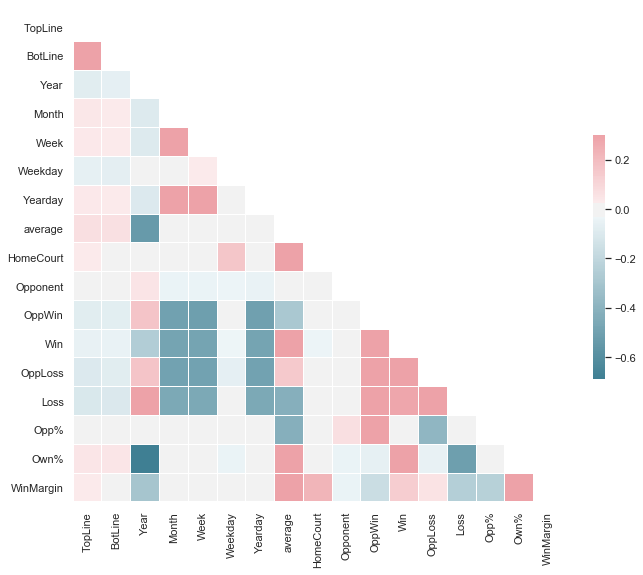

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([[ 0.13330848, -0.13129716, -0.09285841, -0.43090278, -0.00495689,
        -0.02263643,  0.40912374,  0.46137147,  0.03790493, -0.03983304,
        -0.01744356,  0.00139114, -0.05103248,  0.01973269, -0.05675189,
         0.00717317]])

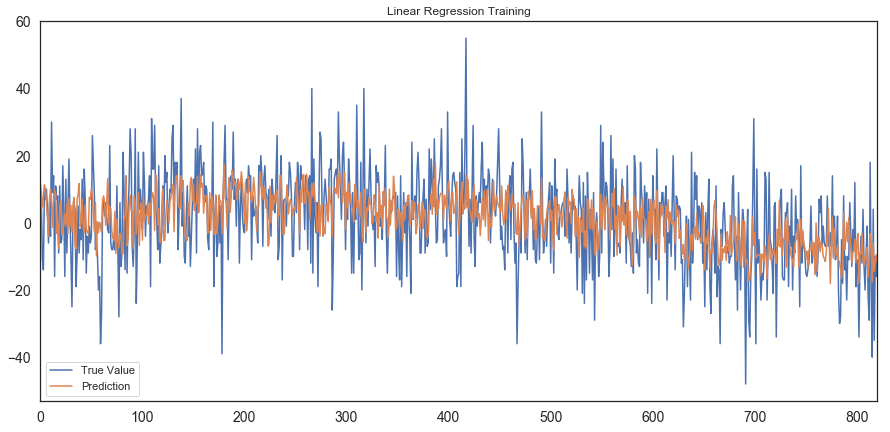

adj train r^2 = 0.2778080671808918
train mse = 127.76896491317305


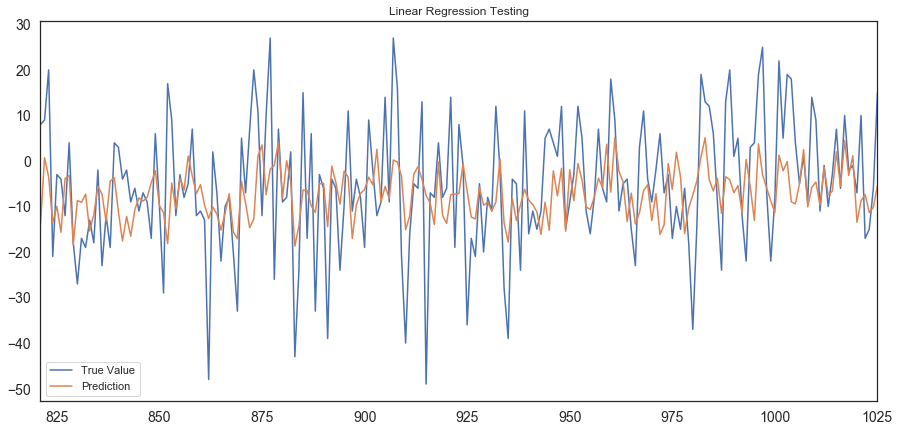

adj test r^2 = 0.1405460864697824
test mse = 172.47642695563502


In [25]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [26]:
from sklearn.metrics import accuracy_score
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 54.2%
The testing accuracy is 52.68%


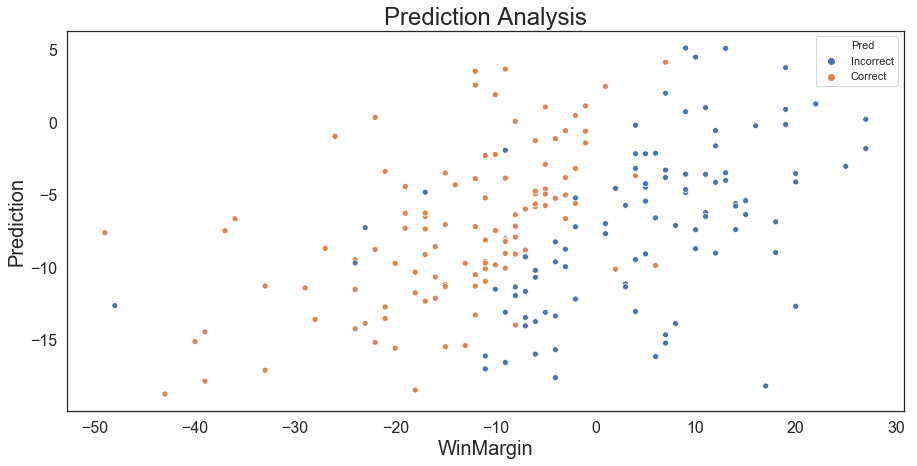

The testing accuracy is 52.68%


In [27]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## Naive Model

In [61]:
one = (len(train_y3[train_y3['Over']>.5]) + len(test_y3[test_y3['Over']>.5])) / (len(train_y3) + len(test_y3)) * 100
zero = (len(train_y3[train_y3['Over']<.5]) + len(test_y3[test_y3['Over']<.5])) / (len(train_y3) + len(test_y3)) * 100

In [62]:
print('Always picking over the line worked ' + str(round(one,2)) + '% of the time')
print('Always picking under the line worked ' + str(round(zero,2)) + '% of the time')

Always picking over the line worked 46.88% of the time
Always picking under the line worked 53.12% of the time


## Extra Trees

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

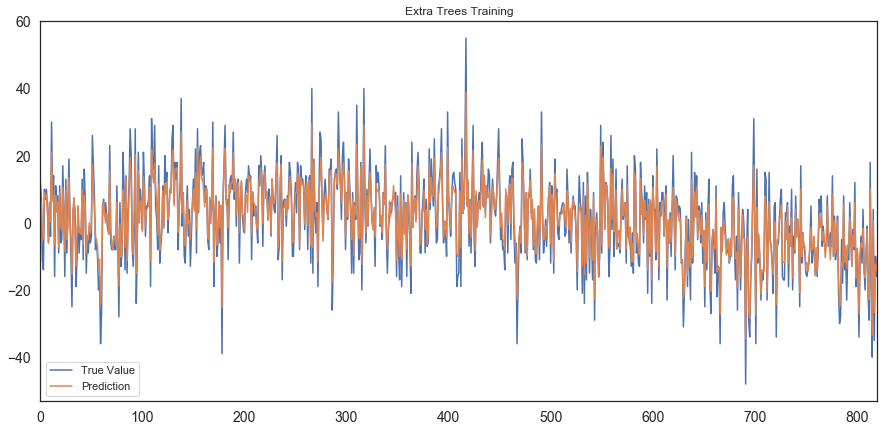

adj train r^2 = 0.8887728014994357
train mse = 19.678126238733206


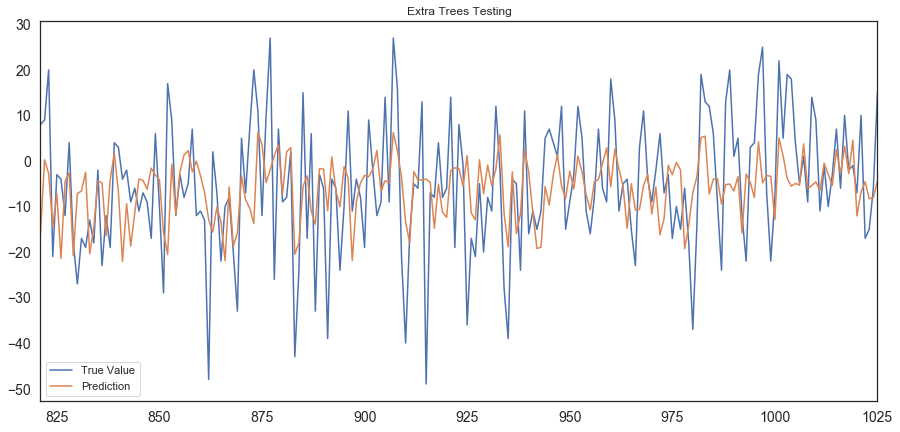

adj test r^2 = 0.10829857282003563
test mse = 178.9479036048781


In [31]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [32]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 93.67%
The testing accuracy is 45.85%


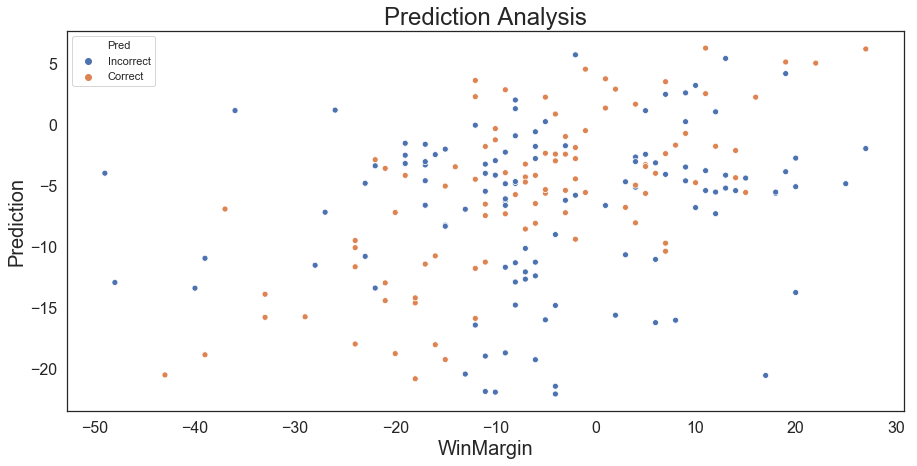

The testing accuracy is 45.85%


In [33]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## Random Forrest

In [34]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.WinMargin.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

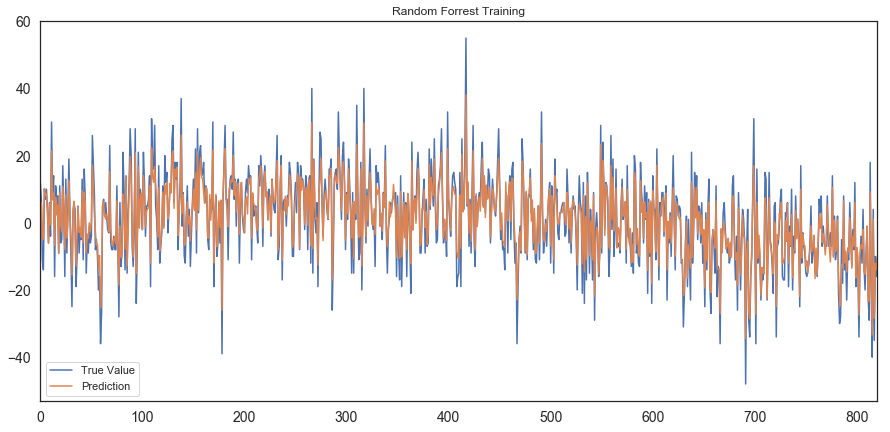

adj train r^2 = 0.8876847777717038
train mse = 19.870617540803853


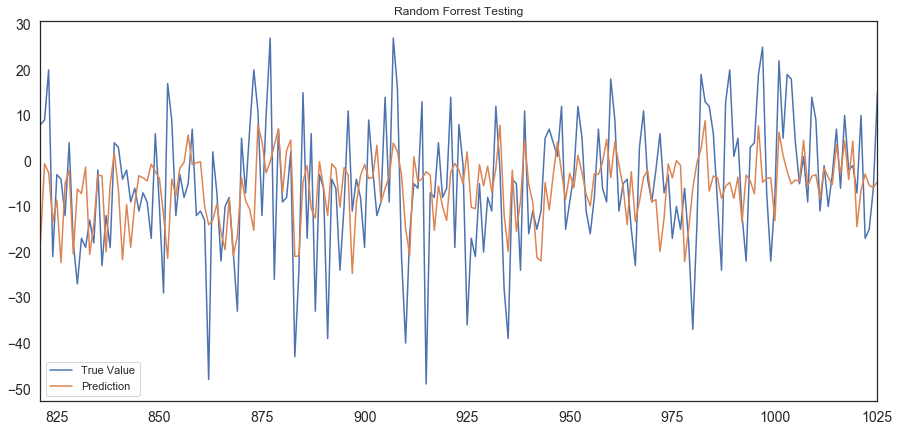

adj test r^2 = 0.08285454955777305
test mse = 184.0540461804879


In [35]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [36]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 94.28%
The testing accuracy is 43.41%


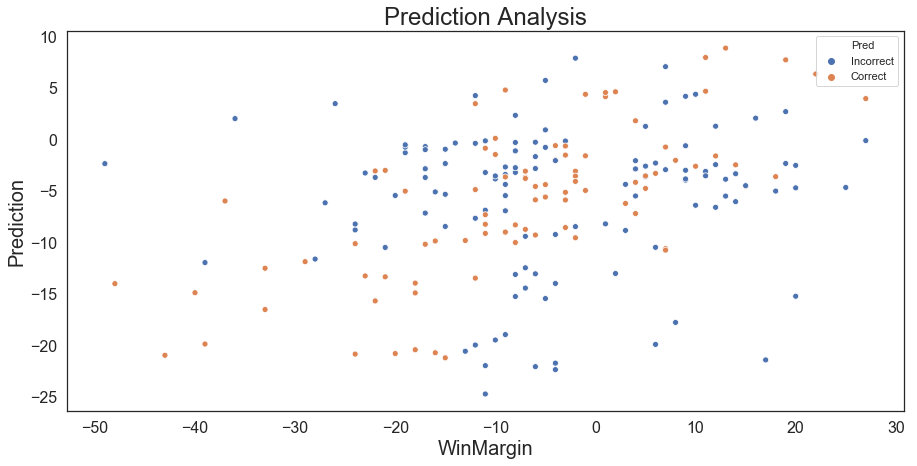

The testing accuracy is 43.41%


In [37]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## XGBoost

In [38]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [39]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.003)
reg.fit(train_x.values, train_y.WinMargin.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.003, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

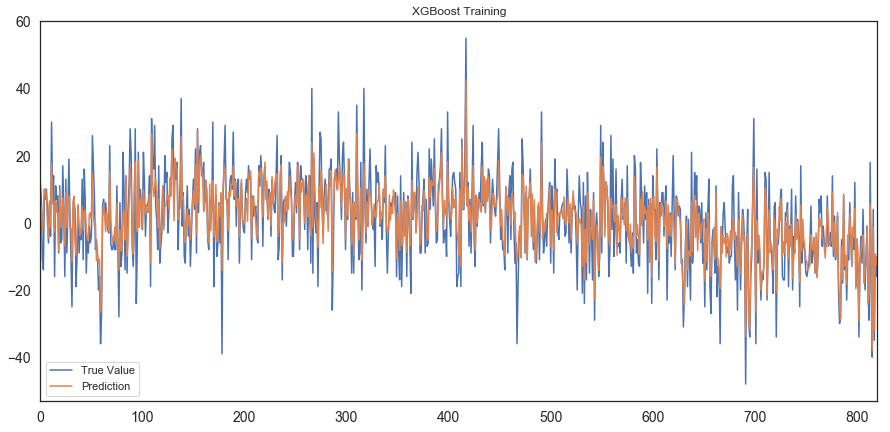

adj train r^2 = 0.7519393651020341
train mse = 43.88646440967146


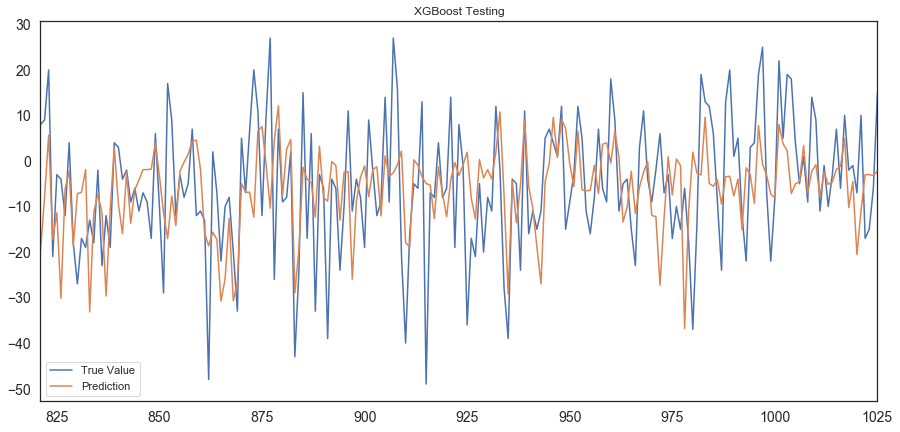

adj test r^2 = 0.04051622427862467
test mse = 192.5505611796906


In [40]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [41]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 83.8%
The testing accuracy is 51.22%


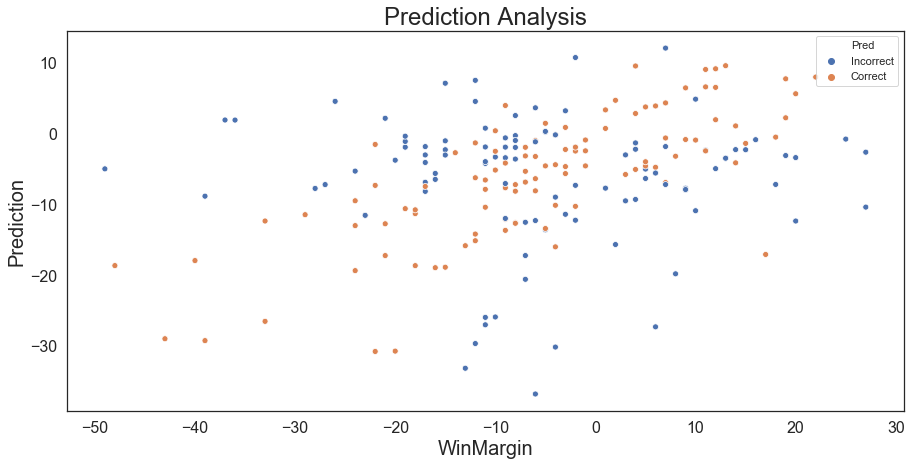

The testing accuracy is 51.22%


In [42]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## Feed Forward Neural Network

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [46]:
K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=16, activation='linear', kernel_regularizer=regularizers.l2(0.23)))
Dropout(.2)
model.add(Dense(34, activation='linear',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.WinMargin.values.ravel(), validation_data=[test_x.values, test_y['WinMargin'].values.ravel()], epochs=500,verbose=0,shuffle=False)

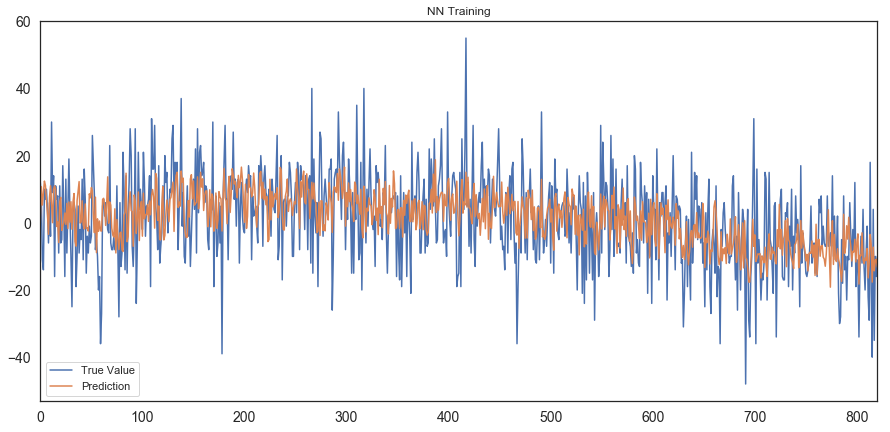

adj train r^2 = 0.27378131824639795
train mse = 128.48137046624691


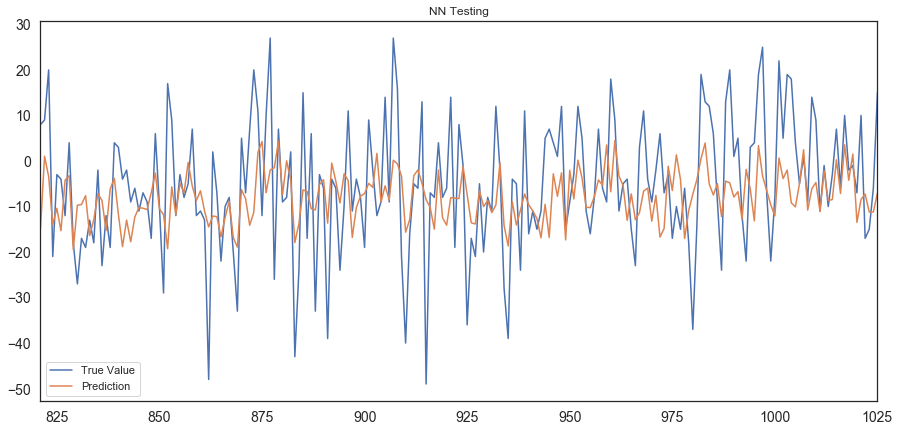

adj test r^2 = 0.12977313773466992
test mse = 174.63835754476497


In [47]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [48]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 53.11%
The testing accuracy is 51.22%


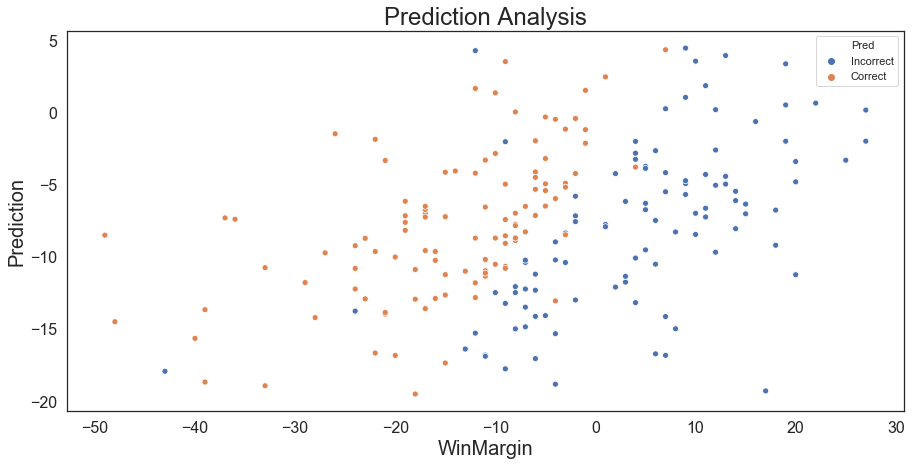

The testing accuracy is 51.22%


In [49]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## LSTM

In [50]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [51]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_initializer='lecun_uniform',recurrent_regularizer=regularizers.l2(0.13)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.WinMargin.values.ravel(), validation_data=[X_tst_t, test_y['WinMargin'].values.ravel()], epochs=20, verbose=0, shuffle=False, callbacks=[early_stop])

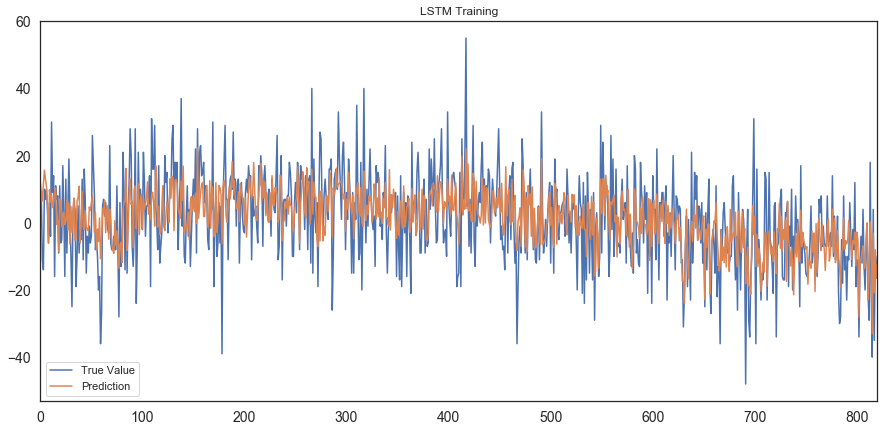

adj train r^2 = 0.4186210665502401
train mse = 102.85656924916974


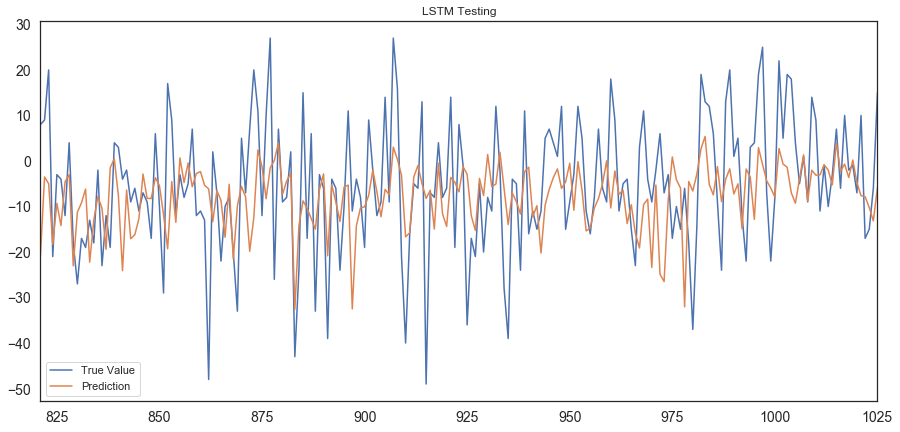

adj test r^2 = 0.04287135294346167
test mse = 192.07793062820076


In [52]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [53]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 65.77%
The testing accuracy is 47.32%


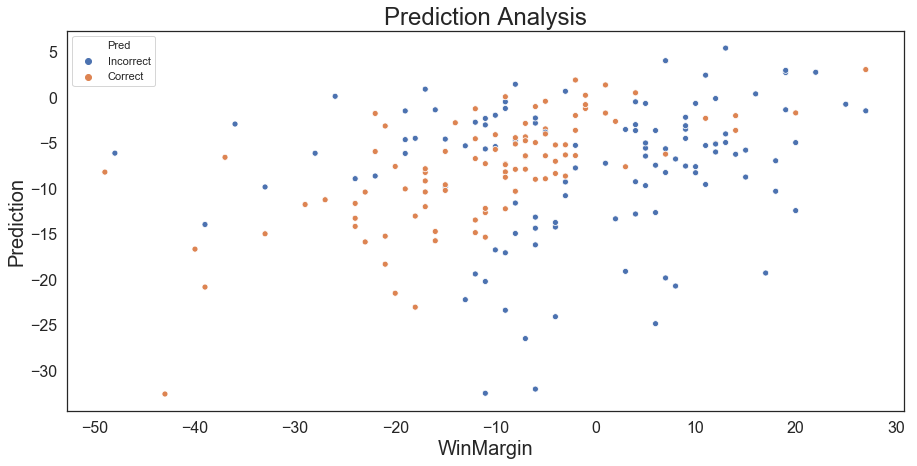

The testing accuracy is 47.32%


In [54]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## TPOT

In [55]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(population_size=10, max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.WinMargin.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)



2.0006399333333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LassoLarsCV(SelectFwe(CombineDFs(ElasticNetCV(CombineDFs(input_matrix, CombineDFs(StandardScaler(ElasticNetCV(input_matrix, l1_ratio=0.6000000000000001, tol=0.1)), CombineDFs(input_matrix, input_matrix))), l1_ratio=0.6000000000000001, tol=0.1), FeatureAgglomeration(input_matrix, affinity=l2, linkage=average)), alpha=0.037), normalize=False)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validat

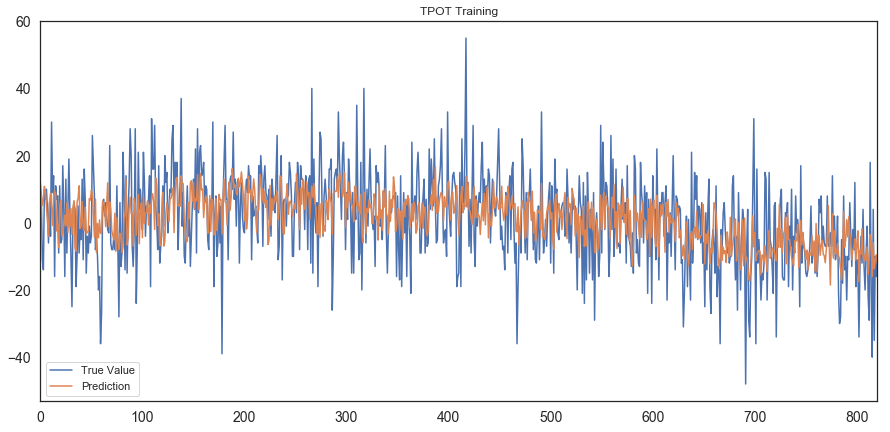

adj train r^2 = 0.27423842638813645
train mse = 128.40049967349893


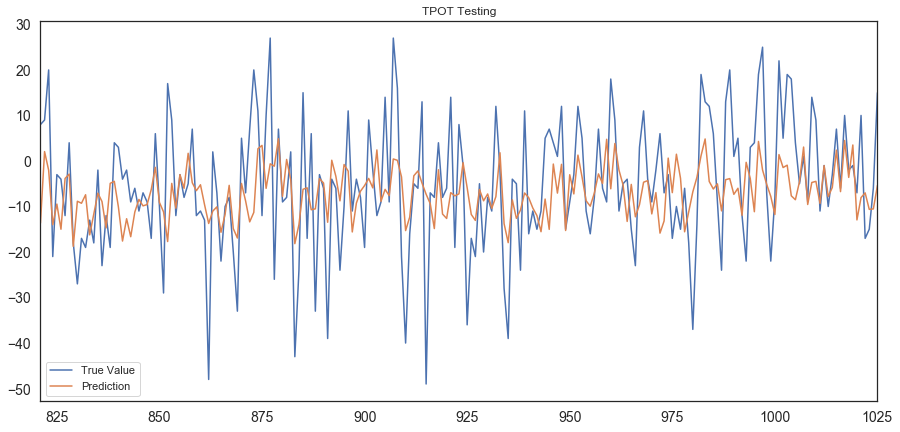

adj test r^2 = 0.16044077183347594
test mse = 168.48393335834362


In [56]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [57]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 55.05%
The testing accuracy is 52.2%


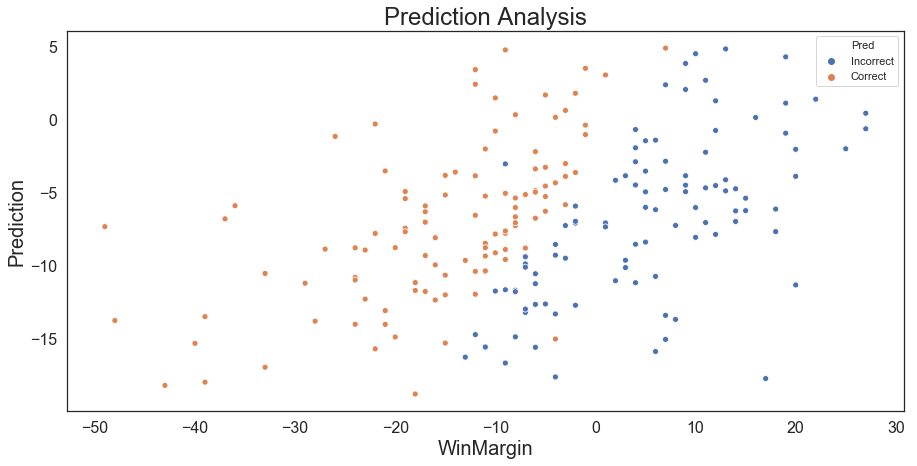

The testing accuracy is 52.2%


In [58]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')